In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
img_shape = (224, 224, 3)
resnet_model = Sequential()
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=img_shape,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

In [3]:
classes = [
    'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
    'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
    'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
    'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
    'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1', 'Class10.2',
    'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4',
    'Class11.5', 'Class11.6'
] #37 vectors of Galaxy Zoo divided into 11 classes based on the 11 different questions and their responses


def append_ext(fn):
    '''
    This function is used to take the GalaxyID from the CSV and append .jpg to it in order to denote the image names. 
    '''
    return fn + ".jpg"

traindf = pd.read_csv(os.path.join(r"D:\OneDrive\Major Project\Code\Galaxy_Morphology\Data\GalaxyZoo1\train", 'training_solutions_rev1.csv')) #Read the Data Frame using pandas

traindf["id"] = traindf['GalaxyID'].astype(str).apply(append_ext) #Create a new column in the Data Frame called 'id' which has the image names.
traindf

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,id
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,100090.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,...,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257,999948.jpg
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,999950.jpg
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,...,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296,999958.jpg
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,...,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334,999964.jpg


In [4]:
datagenerator = ImageDataGenerator(
    fill_mode='nearest',
    cval=0,
    rescale=1/255,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.02)

train_generator = datagenerator.flow_from_dataframe(
    dataframe=traindf,
    directory="D:/OneDrive/Major Project/Code/Galaxy_Morphology/Data/GalaxyZoo1/train/images_training_rev1",
    x_col="id",
    y_col=classes,
    subset="training",
    batch_size=16,
    seed=123,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224))

validation_generator = datagenerator.flow_from_dataframe(
    dataframe=traindf,
    directory="D:/OneDrive/Major Project/Code/Galaxy_Morphology/Data/GalaxyZoo1/train/images_training_rev1",
    x_col="id",
    y_col=classes,
    subset="validation",
    batch_size=16,
    seed=123,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224))

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

Found 60347 validated image filenames.
Found 1231 validated image filenames.


In [5]:
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(len(classes), activation='softmax'))

In [6]:
print(resnet_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 37)                3713061   
                                                                 
Total params: 27,300,773
Trainable params: 3,713,061
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [7]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=5e-4)

resnet_model.compile(optimizer, loss='mse', metrics=["accuracy"])

In [8]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))


early_stopping = EarlyStopping(
    monitor='val_loss', patience=4, verbose=1, mode='auto')

history = LossHistory()

checkpointer = ModelCheckpoint(
    filepath='D:/OneDrive/Major Project/Code/Galaxy_Morphology/Data/GalaxyZoo1/weights/GZ1_TL.hdf5', verbose=2, save_best_only=True)

In [9]:
hist = resnet_model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=30,
    callbacks=[history, checkpointer, early_stopping])

Epoch 1/30
3771/3771 [==============================] - ETA: 0s - loss: 0.0714 - accuracy: 0.2591
Epoch 1: val_loss improved from inf to 0.07138, saving model to D:/OneDrive/Major Project/Code/Galaxy_Morphology/Data/GalaxyZoo1/weights\GZ1_TL.hdf5
3771/3771 [==============================] - 648s 170ms/step - loss: 0.0714 - accuracy: 0.2591 - val_loss: 0.0714 - val_accuracy: 0.2401
Epoch 2/30
3771/3771 [==============================] - ETA: 0s - loss: 0.0714 - accuracy: 0.2593
Epoch 2: val_loss did not improve from 0.07138
3771/3771 [==============================] - 638s 169ms/step - loss: 0.0714 - accuracy: 0.2593 - val_loss: 0.0714 - val_accuracy: 0.2410
Epoch 3/30
3771/3771 [==============================] - ETA: 0s - loss: 0.0714 - accuracy: 0.2593
Epoch 3: val_loss improved from 0.07138 to 0.07136, saving model to D:/OneDrive/Major Project/Code/Galaxy_Morphology/Data/GalaxyZoo1/weights\GZ1_TL.hdf5
3771/3771 [==============================] - 645s 171ms/step - loss: 0.0714 - accur

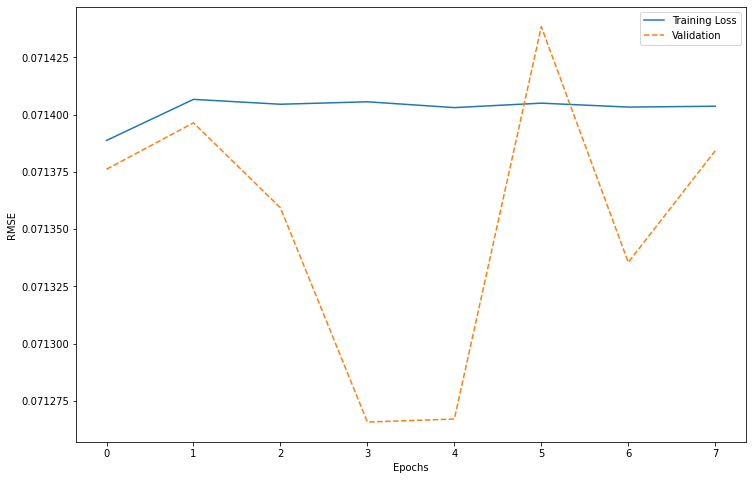

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(hist.epoch, hist.history['loss'], label='Training Loss')
plt.plot(
    hist.epoch, hist.history['val_loss'], label='Validation', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.show()